In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
players=pd.read_csv('../datasets/Players.csv')

In [3]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


### First Lets Start With Players Analysis

In [4]:
players.shape #shape of the dataframe

(3922, 8)

In [5]:
players.isnull().sum()    #checking data quality

Unnamed: 0       0
Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

We can see that there is a null value in a players name. Thus we should delete it

### Players Data Cleaning

In [6]:
players.drop('Unnamed: 0' ,axis=1,inplace=True)

In [7]:
players.dropna(how='all',inplace=True) #dropping the player whose value is null

In [8]:
players.set_index('Player',inplace=True) #setting the player name as the dataframe indexx
players.head(2)

,height,weight,collage,born,birth_city,birth_state
Player,,,,,,
Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


### Basic Analysis

In [9]:
print('The Tallest Player in NBA History is:',players['height'].idxmax(),' with height=',players['height'].max(),' cm')
print('The Heaviest Player in NBA History is:',players['weight'].idxmax(),' with weight=',players['weight'].max(),' kg')

The Tallest Player in NBA History is: Manute Bol  with height= 231.0  cm
The Heaviest Player in NBA History is: Sim Bhullar  with weight= 163.0  kg


In [10]:
print('The Shortest Player in NBA History is:',players['height'].idxmin(),' with height=',players['height'].min(),' cm')
print('The Lightest Player in NBA History is:',players['weight'].idxmin(),' with weight=',players['weight'].min(),' kg')

The Shortest Player in NBA History is: Muggsy Bogues  with height= 160.0  cm
The Lightest Player in NBA History is: Spud Webb  with weight= 60.0  kg


In [11]:
print('The average height of NBA Players is ',players['height'].mean())
print('The average weight of NBA Players is ',players['weight'].mean())

The average height of NBA Players is  198.70492221372098
The average weight of NBA Players is  94.78321856669217


The average height comes around 6.5 feet. That's more than the average height of people in many countries..:p

### Distribution Of Heights

[]

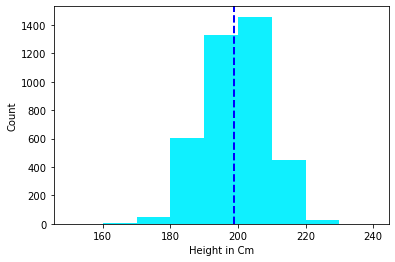

In [12]:
bins=range(150,250,10)
plt.hist(players["height"],bins,histtype="bar",rwidth=1,color='#0ff0ff')
plt.xlabel('Height in Cm')
plt.ylabel('Count')
plt.axvline(players["height"].mean(), color='b', linestyle='dashed', linewidth=2)
plt.plot()

**Observations:**
The heights of the players are majorly in the range 200-210 cm followed by range 190-200 cm. The mean height as seen is around 199 cm

### Distribution Of Weights

[]

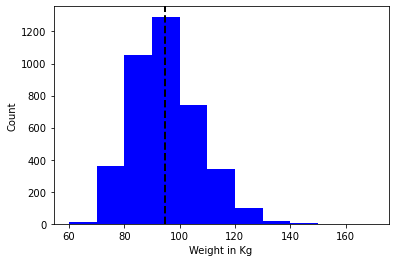

In [13]:
bins=range(60,180,10)
plt.hist(players["weight"],bins,histtype="bar",rwidth=1.2,color='Blue')
plt.xlabel('Weight in Kg')
plt.ylabel('Count')
plt.axvline(players["weight"].mean(), color='black', linestyle='dashed', linewidth=2)
plt.plot()

**Observations:** 
The weights of players are majorly in the range 90-100 kgs and the mean weight is around 95 kg

### Colleges Giving Maximum Players 

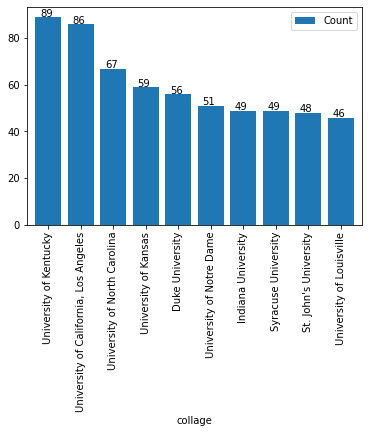

In [14]:
college=players.groupby(['collage'])['height'].count().reset_index().sort_values(by='height',ascending=False)[:10]
college.set_index('collage',inplace=True)
college.columns=['Count']
ax=college.plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.35))
plt.show()

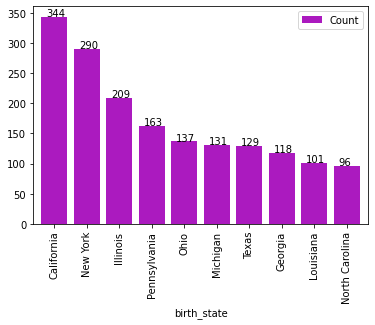

In [15]:
city=players.groupby(['birth_state'])['height'].count().reset_index().sort_values(by='height',ascending=False)[:10]
city.set_index('birth_state',inplace=True)
city.columns=['Count']
ax=city.plot.bar(width=0.8,color='#ab1abf')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

California has the highest number of players followed by New-York.